In [26]:
!pip install yfinance
!pip install git+https://github.com/dcajasn/Riskfolio-Lib.git
!pip install PyPortfolioOpt

#Faut changer notre version de numpy et pandas, pour l'avant dernière
!pip install Numpy==1.23.5
!pip install pandas==1.3.2



  Cloning https://github.com/dcajasn/Riskfolio-Lib.git to /private/var/folders/k5/ktrf3j117gs1ppk87tw6dxbc0000gn/T/pip-req-build-z86lvq0e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for Riskfolio-Lib: filename=Riskfolio_Lib-4.4.2-cp38-cp38-macosx_10_14_x86_64.whl size=183430 sha256=2baf5ac168bcd5ab947badcbbd2f2ff8049e6bb24c94f5339953ccae397557ea
  Stored in directory: /private/var/folders/k5/ktrf3j117gs1ppk87tw6dxbc0000gn/T/pip-ephem-wheel-cache-75r64ge5/wheels/32/11/d0/056926a99810470e8134d20f48757fcc5180097befacd82dd8
Successfully built Riskfolio-Lib


In [142]:
run data.py

[*********************100%%**********************]  11 of 11 completed


In [143]:
rets

,EAGG,ESGD,ESGE,ESGU,ESML,GOVT,MBB,SHY,SUSA,SUSB,SUSC
Date,,,,,,,,,,,
2018-10-24,0.000000,-0.027891,-0.029961,-0.030399,-0.028717,0.003722,0.002248,0.001566,-0.026467,0.000818,0.000963
2018-10-25,0.000000,0.012368,0.015941,0.017743,0.012648,-0.002472,0.000097,-0.000361,0.016738,-0.001225,0.000293
2018-10-26,0.000000,-0.007979,-0.008500,-0.018281,-0.011138,0.003717,0.001365,0.000602,-0.009823,0.002453,0.002510
2018-10-29,0.003195,-0.001676,-0.017474,-0.005517,-0.009654,-0.000412,0.000000,0.000361,-0.010655,0.000000,-0.003171
2018-10-30,-0.001194,0.011917,0.018456,0.010679,0.016247,-0.001646,-0.001266,-0.000481,0.020797,-0.002121,-0.001842
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-13,0.001108,0.002022,-0.000650,-0.001552,-0.000617,0.000000,-0.000677,0.000370,-0.001965,0.000420,0.000000
2023-11-14,0.009296,0.025659,0.026675,0.021030,0.048502,0.009991,0.015023,0.003949,0.023414,0.006723,0.012880
2023-11-15,-0.002193,-0.000703,0.008872,0.001319,0.004125,-0.004946,-0.007456,-0.001844,0.003314,-0.002087,-0.004087


In [144]:
#Annualized variance of returns
np.sqrt(rets.var()*252)

EAGG    0.057443
ESGD    0.198076
ESGE    0.222638
ESGU    0.219093
ESML    0.258273
GOVT    0.059937
MBB     0.060203
SHY     0.017925
SUSA    0.217391
SUSB    0.044815
SUSC    0.090203
dtype: float64

## Risk parity relaxed optim based on historical rets and cov

Build the linear constraint based on the ESG rating

In [225]:
import pandas as pd
from riskfolio import factors_constraints

# Your DataFrame
ESG_constraint_data = {
    'ESG Fund Rating': [6.6, 8.6, 7.1, 7.3, 6.5, 5.7, 6, 5.7, 8.2, 7.9, 7.6],
}

ESG_constraint = pd.DataFrame(ESG_constraint_data)

# Define the constraints based on your DataFrame
constraints = pd.DataFrame({
    'Disabled': [False],
    'Factor': ['ESG Fund Rating'],
    'Sign': ['>='],
    'Value': [7],
    'Relative Factor': '',
})

# Create the factors constraints matrices C and D
C, D = factors_constraints(constraints, loadings=ESG_constraint)



In [278]:
# Building the portfolio object nea== minimal number of assets to include
port = rp.Portfolio(returns=rets,ainequality = C, binequality = D, nea = 6)

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model = 'Classic' # Could be Classic (historical) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
b = None # Risk contribution constraints vector


## Minimum Variance Portfolio

,EAGG,ESGD,ESGE,ESGU,ESML,GOVT,MBB,SHY,SUSA,SUSB,SUSC
weights,0.139171,0.074286,1.792132e-08,1.401191e-08,4.171648e-09,0.096029,0.08109,0.173064,0.034155,0.28471,0.117495


The weighted average ESG rating of this portfolio is 7.000000007867602


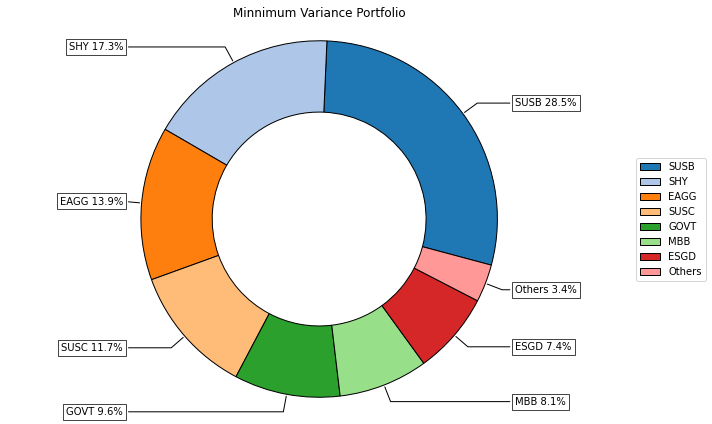

In [281]:
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Minnimum Variance Portfolio', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)


w_weights = w['weights'].values.reshape(1, -1)
esg_ratings = ESG_constraint['ESG Fund Rating'].values.reshape(-1, 1)

ESG_Rating_portfolio = w_weights.dot(esg_ratings).item()
print(f'The weighted average ESG rating of this portfolio is {ESG_Rating_portfolio}')

## Risk Parity Portfolio

/Users/remimailhot/opt/anaconda3/lib/python3.8/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


,EAGG,ESGD,ESGE,ESGU,ESML,GOVT,MBB,SHY,SUSA,SUSB,SUSC
weights,0.100898,0.035478,0.038566,0.035453,0.032342,0.106401,0.091782,0.125158,0.03339,0.325645,0.074888


The weighted average ESG rating of this portfolio is 7.000000203108467


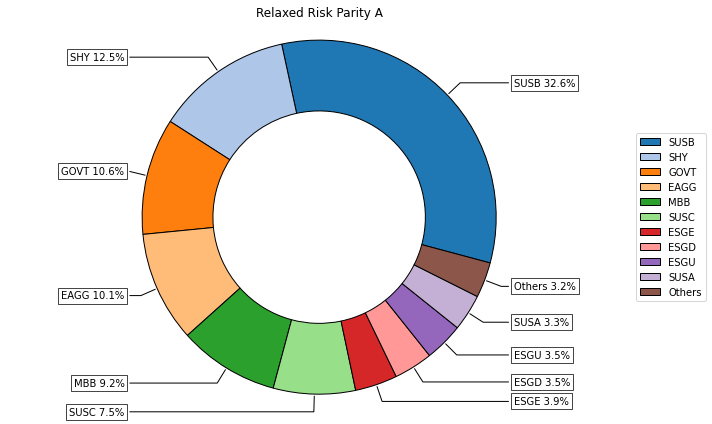

In [279]:
version = 'A' # Could be A, B or C

w_rrp_a = port.rrp_optimization(model=model, version=version, l=l, b= None, hist=hist)

display(w_rrp_a.T)
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w_rrp_a, title='Relaxed Risk Parity A', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)


w_rrp_a_weights = w_rrp_a['weights'].values.reshape(1, -1)
esg_ratings = ESG_constraint['ESG Fund Rating'].values.reshape(-1, 1)

ESG_Rating_portfolio = w_rrp_a_weights.dot(esg_ratings).item()
print(f'The weighted average ESG rating of this portfolio is {ESG_Rating_portfolio}')

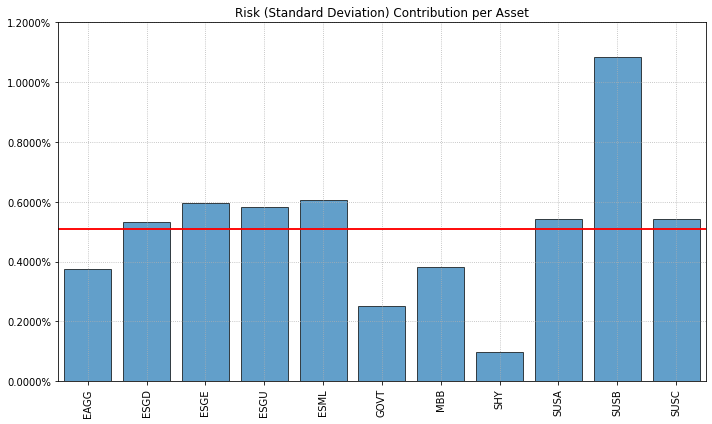

In [280]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

# Plotting the risk composition of the portfolio
ax = rp.plot_risk_con(w_rrp_a, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.05,
                      color="tab:blue", height=6, width=10, ax=ax)

# Plotting equal risk contribution line
a1 = rp.Sharpe_Risk(w_rrp_a, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.05)
ax.axhline(y=a1/len(assets) * 252**0.5, color='r', linestyle='-')


# Views on Black Litterman Portfolio

In [271]:
asset_classes = {'Assets':["ESGU", "EAGG", "ESGE", "ESML", "SUSB", "ESGD", "SHY", "SUSA", "GOVT", "MBB", "SUSC"]}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

views = {'Disabled': [False, False, False],
         'Type': ['Assets', 'Assets', 'Assets'],
         'Set': ['', '', ''],
         'Position': ['SHY', 'ESGE', 'SUSB'],
         'Sign': ['<=', '>=', '>='],
         'Return': [0.08, 0.5, 0], # Annual terms 
         'Type Relative': [ '', '', ''],
         'Relative Set': [ '', '', ''],
         'Relative': ['', '', '']
}

views = pd.DataFrame(views)

display(views)

,Disabled,Type,Set,Position,Sign,Return,Type Relative,Relative Set,Relative
0,False,Assets,,SHY,<=,0.08,,,
1,False,Assets,,ESGE,>=,0.50,,,
2,False,Assets,,SUSB,>=,0.00,,,


In [272]:
P,Q = rp.assets_views(views, asset_classes)

## Black Litterman optimization

In [282]:
# Estimate Black Litterman inputs:

port.blacklitterman_stats(P, Q/252, rf=rf, w=w, delta=None, eq=True)

# Estimate optimal portfolio:

model='BL'# Black Litterman
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = False # Use historical scenarios for risk measures that depend on scenarios

w_bl = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w_bl.T)

,EAGG,ESGD,ESGE,ESGU,ESML,GOVT,MBB,SHY,SUSA,SUSB,SUSC
weights,0.227284,0.086523,0.074367,2.994087e-07,1.328173e-07,0.126737,0.145607,0.010168,0.000007,0.236775,0.092531


The weighted average ESG rating of this BL portfolio is 7.000000329719693


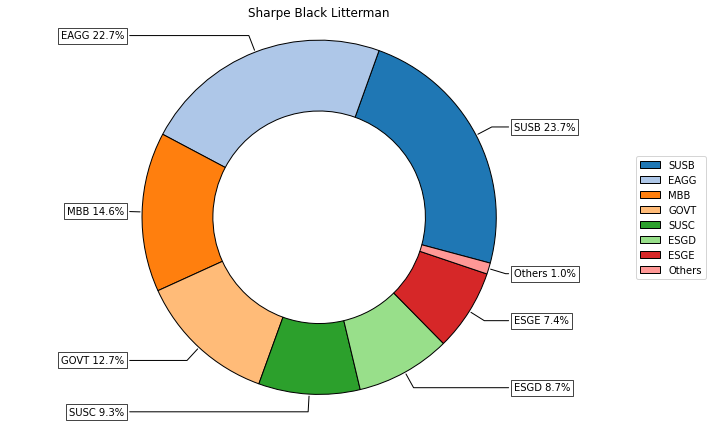

In [283]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w_bl, title='Sharpe Black Litterman', others=0.05, nrow=25,
                 cmap = "tab20", height=6, width=10, ax=None)

w_bl_weights = w_bl['weights'].values.reshape(1, -1)

ESG_Rating_BLportfolio = w_bl_weights.dot(esg_ratings).item()
print(f'The weighted average ESG rating of this BL portfolio is {ESG_Rating_BLportfolio}')               

In [284]:
points = 100 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,EAGG,ESGD,ESGE,ESGU,ESML,GOVT,MBB,SHY,SUSA,SUSB,SUSC
0,0.139170,0.074287,1.794721e-08,1.401746e-08,4.173222e-09,0.096029,0.081093,0.173062,0.034152,0.284710,0.117497
1,0.170768,0.081255,2.842424e-02,8.493422e-10,3.359471e-10,0.099712,0.095220,0.131558,0.012518,0.293263,0.087283
2,0.187993,0.081905,4.112922e-02,5.209173e-09,2.068473e-09,0.104014,0.105536,0.104030,0.006575,0.289503,0.079314
3,0.200817,0.082807,4.991220e-02,5.582688e-09,2.355564e-09,0.108634,0.115017,0.080634,0.003317,0.282040,0.076822
4,0.210475,0.083912,5.698324e-02,7.052657e-09,2.962385e-09,0.113218,0.123649,0.060250,0.001187,0.272569,0.077757


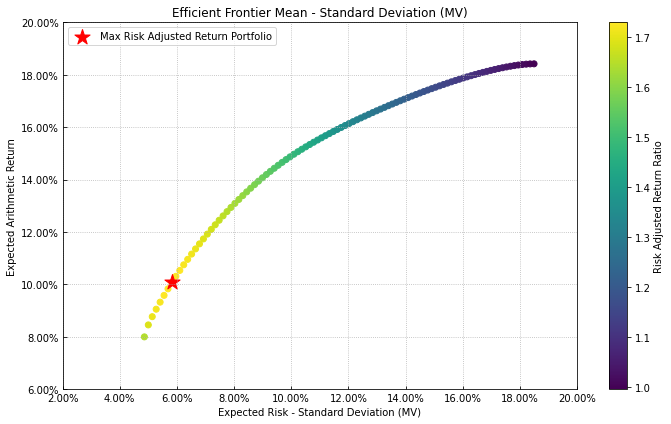

In [285]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu_bl # Expected returns of Black Litterman model
cov = port.cov_bl # Covariance matrix of Black Litterman model
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w_bl, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

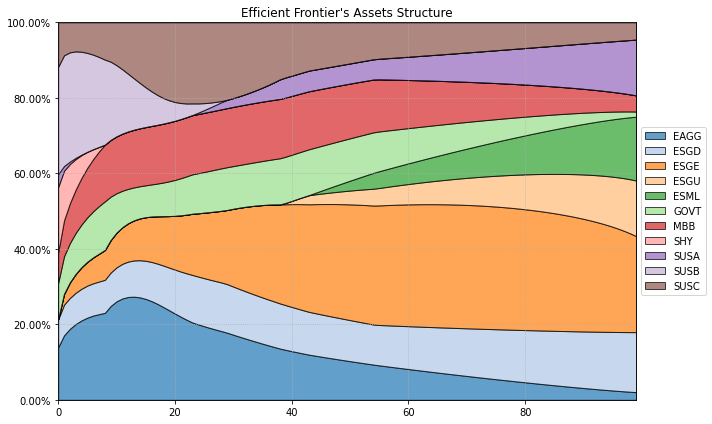

In [286]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

In [287]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])
port.alpha = 0.05

for i in rms:
    if i == 'MV':
        hist = False
    else:
        hist = True
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

/Users/remimailhot/opt/anaconda3/lib/python3.8/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [288]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')


,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
EAGG,22.73%,16.18%,22.49%,15.81%,22.66%,22.53%,22.72%,20.39%,0.00%,0.00%,0.00%,0.00%,0.00%
ESGD,8.65%,5.88%,9.43%,5.63%,9.54%,13.45%,3.58%,1.55%,0.30%,17.60%,4.02%,17.34%,2.16%
ESGE,7.44%,4.36%,5.53%,4.29%,5.55%,8.26%,0.00%,1.64%,16.45%,0.00%,18.18%,2.49%,15.20%
ESGU,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,23.19%,20.32%,21.78%,21.79%,23.93%
ESML,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,5.22%,0.00%,0.00%,0.00%,1.64%
GOVT,12.67%,5.71%,13.24%,5.24%,13.67%,18.26%,16.83%,15.96%,1.87%,6.20%,2.79%,5.60%,2.71%
MBB,14.56%,19.63%,13.71%,19.65%,13.31%,9.36%,7.46%,4.60%,20.53%,17.33%,20.85%,16.84%,19.10%
SHY,1.02%,7.92%,2.31%,8.46%,2.14%,1.88%,4.85%,7.54%,8.08%,21.21%,11.01%,20.90%,11.70%
SUSA,0.00%,2.53%,0.00%,2.58%,0.00%,0.00%,8.82%,7.50%,16.87%,10.29%,15.87%,10.70%,17.67%
SUSB,23.68%,27.56%,24.35%,27.53%,24.11%,21.52%,23.29%,23.83%,7.49%,7.06%,5.51%,4.34%,5.90%


<Axes: >

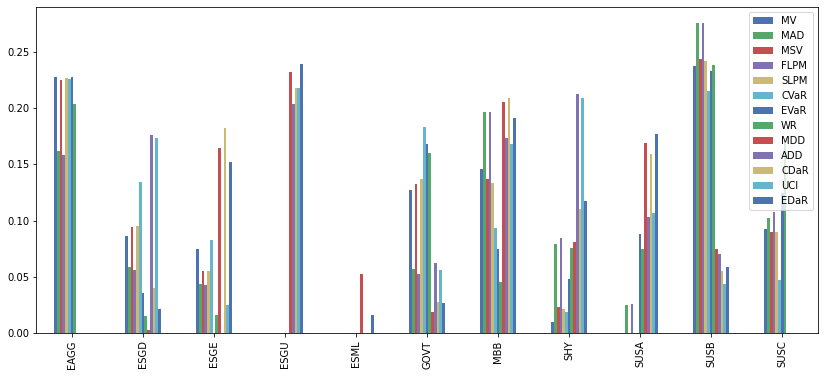

In [289]:
# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)